In [1]:
import sys
sys.path.append('../')

from base_graph import *
%matplotlib inline

In [2]:
def visualize(graph, pos=None, node_size=350, edge_size=14, edge_label=True, undirected=True, font_size=12):
        
    if pos == None:
        n_nodes = graph.n_nodes
        pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2), np.sin(2 * np.pi * n / n_nodes + np.pi/2)]) for n in range(n_nodes)}

    length = graph.length
    fig = plt.figure(figsize=(3*length + 1*(length-1), 3))
    grid = plt.GridSpec(1, 3*length + length-1)
    counter = 0
    
    options = {
        "font_size": font_size,
        "node_size": node_size,
        "node_color": "lightgray",
        "edgecolors": "black",
        "linewidths": 2,
        "width": 2.5,
    }
        
    for t in range(graph.length):
        ax = fig.add_subplot(grid[0, counter:counter+3])
        
        if undirected:
            G = nx.Graph()
        else:
            G = nx.DiGraph()
        edge_labels = {}
                     
        for i in range(graph.n_nodes):
            G.add_node(str(i))
                
            for i in range(graph.n_nodes):
                for j in range(graph.n_nodes):
                    if i != j: # Remove self-loops.
                        if graph.w_list[t][i,j] > 0:
                            G.add_edge(str(i), str(j))

        ax = plt.gca()
        ax.margins(0.20)
        plt.axis("off")

        nx.draw(G, pos=pos, labels={str(i) : str(i+1) for i in range(graph.n_nodes)}, **options)
        
        if t != length-1:
            ax_arrow = fig.add_subplot(grid[0, counter+3:counter+4])
            
            ax_arrow.annotate("", xy=(1.0, 0), xytext=(0, 0), arrowprops=dict(facecolor='black',arrowstyle='-|>,head_width=0.75, head_length=0.75',lw=4))
            plt.ylim(-1, 1)
            plt.axis("off")
            counter += 4       
        if edge_label:
            nx.draw_networkx_edge_labels(
                G, pos,
                edge_labels,
                font_color='black',
                font_size=edge_size)

# Base-2 Graph

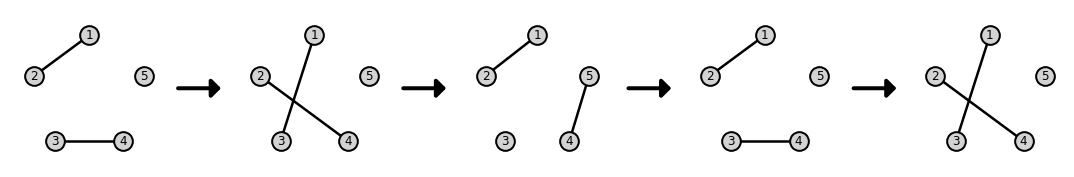

In [3]:
# Base-2 Graph with 5 nodes.
graph = BaseGraph(5, 1)
visualize(graph)

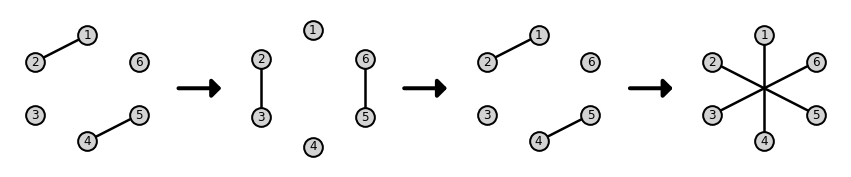

In [4]:
# Base-2 Graph with 6 nodes.
graph = BaseGraph(6, 1)
visualize(graph)

# Base-3 Graph

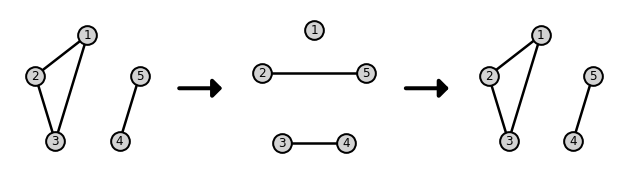

In [5]:
# Base-3 Graph with 5 nodes.
graph = BaseGraph(5, 2)
visualize(graph)

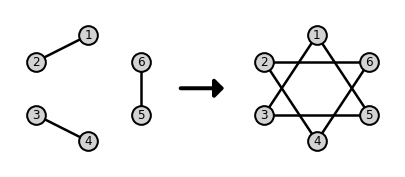

In [6]:
# Base-3 Graph with 6 nodes.
graph = BaseGraph(6, 2)
visualize(graph)

# Base-4 Graph

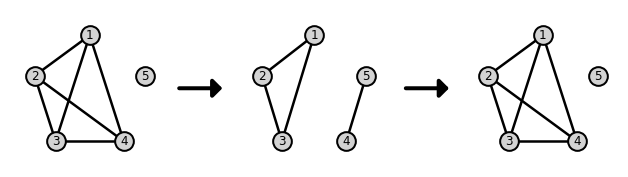

In [7]:
# Base-4 Graph with 5 nodes.
graph = BaseGraph(5, 3)
visualize(graph)

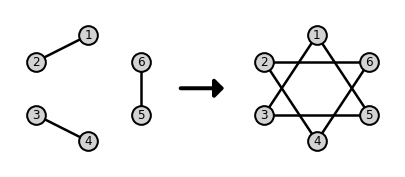

In [8]:
# Base-4 Graph with 6 nodes.
graph = BaseGraph(6, 3)
visualize(graph)